###Importing necesarry libraries

In [4]:
pip install tweepy

In [5]:
#Getting the necessary libraries
import tweepy as tweepy
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import json
import pandas as pd
import matplotlib.pyplot as plt

import csv
import re #regular expression
from textblob import TextBlob
import string

In [6]:
#consumer keys
consumerKey = "xxxxxxxxxx"
consumerSecret = "xxxxxxx"
accessKey = "xxxxxxxxxx"
accessSecret = "xxxxxxxxx"

In [7]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessKey, accessSecret)

api = tweepy.API(auth)



In [80]:
# userID = ['wapikazi', 
# 'ajiraKE',  'wapikazi', 'ikokaziKE', 
tweets = api.user_timeline(screen_name='ikokaziKenya',   count=500,   include_rts = True,  tweet_mode = 'extended' )
tweets
#Combine keywords
#try to search for youth e.g. #Vijana 
#Scrape individuals AjiraKE, IkoKaziKE, IkoKaziKenya


Output hidden; open in https://colab.research.google.com to view.

In [81]:
def remove_url(txt):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [82]:
tweet_list = []
import re #regular expression
from textblob import TextBlob
import string

tweetsurl = []
for tweet in tweets:
      tweets_no_url = remove_url(tweet.full_text)
      tweetsurl.append(tweets_no_url.lower())
    #   Tweet = tweet.full_text
      Location = tweet.user.location
      User = tweet.user.screen_name
      tweet_list.append([User, Location,tweets_no_url])

tweet_list

[['IkoKaziKenya',
  '',
  'RT HonTimWanyonyi Our NG CDF committee invites applications for qualified suppliers contractors amp service providers for the next financ'],
 ['IkoKaziKenya',
  '',
  'RT ndacuwachira How it started how its going ElejancontractorsWe are dedicated and ready to offer you good services IkoKaziK'],
 ['IkoKaziKenya',
  '',
  'RT Denisetranquil And did I mention government is the best employer IkoKaziKenya IkoKaziKE'],
 ['IkoKaziKenya',
  '',
  'RT GoodKitchenKe Kitchen sets available3500 per setFree delivery within Nairobi CBD'],
 ['IkoKaziKenya',
  '',
  'RT GoodKitchenKe This cup is available at 1000Best for your officeFree delivery within Nairobi CBD'],
 ['IkoKaziKenya',
  '',
  'RT transtrailer WE ARE HIRINGWe are looking for a Mechanical Engineer to join our team You should be able to work with minimum superv'],
 ['IkoKaziKenya',
  '',
  'RT Finance501 JOB Advisor Supply Chain Information Systems RESCUEorg Nairobi KE NGO Degree 68 years of experience in plann

In [83]:
df = pd.DataFrame(data=tweet_list,
                 columns=['User', 'Location', 'Tweet'])
df.head()

,User,Location,Tweet
0,IkoKaziKenya,,RT HonTimWanyonyi Our NG CDF committee invites...
1,IkoKaziKenya,,RT ndacuwachira How it started how its going E...
2,IkoKaziKenya,,RT Denisetranquil And did I mention government...
3,IkoKaziKenya,,RT GoodKitchenKe Kitchen sets available3500 pe...
4,IkoKaziKenya,,RT GoodKitchenKe This cup is available at 1000...


In [84]:
df.info

<bound method DataFrame.info of              User Location                                              Tweet
0    IkoKaziKenya           RT HonTimWanyonyi Our NG CDF committee invites...
1    IkoKaziKenya           RT ndacuwachira How it started how its going E...
2    IkoKaziKenya           RT Denisetranquil And did I mention government...
3    IkoKaziKenya           RT GoodKitchenKe Kitchen sets available3500 pe...
4    IkoKaziKenya           RT GoodKitchenKe This cup is available at 1000...
..            ...      ...                                                ...
188  IkoKaziKenya           RT karigoh IkoKaziKenya MilanKE Wakurudishie p...
189  IkoKaziKenya           RT karenmaina MilanKE Rudisheni pesa ya wenyew...
190  IkoKaziKenya           RT Opesh Lakini ukisikia influencers wakisifu ...
191  IkoKaziKenya                     Opesh I just want my money back MilanKE
192  IkoKaziKenya           karigoh MilanKE Just wondering if I have evide...

[193 rows x 3 columns]>

In [85]:
df.describe()

,User,Location,Tweet
count,193,193,193
unique,1,1,188
top,IkoKaziKenya,,RT trapfestafrica
freq,193,193,4


In [86]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
tweets_combo = ' '
# instantiate a word cloud object
for val in df['Tweet']: 
          # typecaste each val to string 
    val = str(val) 
      # split the value 
    tokens = val.split() 
          # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    tweets_combo += " ".join(tokens)+" "

tweets_combo =  tweets_combo.replace('ajirake', '').replace('ikokazike', '').replace('via', '').replace(' https://t.co/', '').replace('j0qwsr5jjq', '').replace('jobs', '').replace('hiring', '').replace('ajira_ke', '')

df_wc = WordCloud(
    background_color='white',
    max_words=10000,
    stopwords=stopwords
)
# tweets_combo
# generate the word cloud
df_wc.generate(tweets_combo)

In [87]:
tweets_combo

' rt hontimwanyonyi our ng cdf committee invites applications for qualified suppliers contractors amp service providers for the next financ rt ndacuwachira how it started how its going elejancontractorswe are dedicated and ready to offer you good services ikokazik rt denisetranquil and did i mention government is the best employer nya  rt goodkitchenke kitchen sets available3500 per setfree delivery within nairobi cbd rt goodkitchenke this cup is available at 1000best for your officefree delivery within nairobi cbd rt transtrailer we are we are looking for a mechanical engineer to join our team you should be able to work with minimum superv rt finance501 job advisor supply chain information systems rescueorg nairobi ke ngo degree 68 years of experience in plann rt finance501 job chief risk officer familybankkenya nairobi ke banking services bachelors degree in accounting finance ec rt covetedhrke our clients in the automotive industry and in the fmcg industry are looking to fill the fo

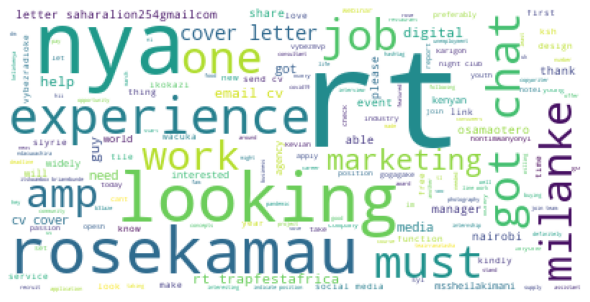

In [88]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(df_wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [89]:
from google.colab import drive
drive.mount('drive')


Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [90]:
df.to_csv('ikokaziKenyar.csv')
!cp ikokaziKenyar.csv "drive/My Drive/"